# TME3 - Descente de gradient
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Algorithme de descente de gradient
---

In [2]:
def optimize(fonc, dfonc, xinit, eps, max_iter):
    """ Algorithme du gradient avec :
        fonc : fonction
        dfonc : gradient de fonc
        xinit : point initial
        eps : pas de gradient
        max_iter : nombre d'itérations
    """
    X = np.zeros((max_iter,) + xinit.shape)
    X[0] = xinit # On initialise avec xinit
    dfX = np.zeros(X.shape) # valeurs du gradient stockés au fur et a mesure
    i = 0
    while i < max_iter-1:
        dfX[i] = dfonc(X[i])
        X[i+1] = X[i] - eps * dfX[i]
        i += 1
    dfX[i] = dfonc(X[i]) # dernière valeur du gradient
    
    return X, fonc(X), dfX

## Optimisation de fonctions
---

Définition des fonctions

In [3]:
def fonction1(x):
    """ Fonction à 1 dimension """
    return x * np.cos(x)

def fonction2(x):
    """ Fonction à 1 dimension """
    return -np.log(x) + x**2

def fonction3(x):
    """ Fonction à 2 dimensions """
    if type(x) == np.ndarray and len(x.shape) > 1:
        x1, x2 = x[:,0], x[:,1]
    else:
        x1, x2 = x[0], x[1]
    return 100 * (x1 - x2**2)**2 + (1 - x1)**2


Définition des gradients

In [4]:
def dfonction1(x):
    return -np.sin(x)*x + np.cos(x)

def dfonction2(x):
    return -1/x + 2*x

def dfonction3(x):
    x1, x2 = x[0], x[1]
    return np.array([200*(x1 - x2**2)*x1 - 2*(1 - x1), \
                    -400*(x1 - x2**2)*x2])


Affichage 2d

In [5]:
def afficher1d(x_histo, f_histo, grad_histo):
    plt.figure(figsize=(9,5))
    plt.plot(range(iterations), x_histo, label="x")
    plt.plot(range(iterations), f_histo, label="f(x)")
    plt.plot(range(iterations), grad_histo, label="f'(x)")
    plt.legend()
    plt.show()
    
def afficheLogDifference(x_histo):
    """ affiche la courbe (t,log(||xt−x∗||)), avec x∗la valeur optimale atteinte """
    t = range(len(x_histo)-1)
    vals = np.log(np.abs(x_histo - x_histo[-1])[:-1])
    plt.plot(t, vals, color="r")
    plt.show()

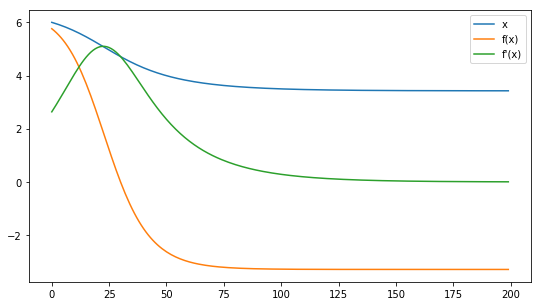

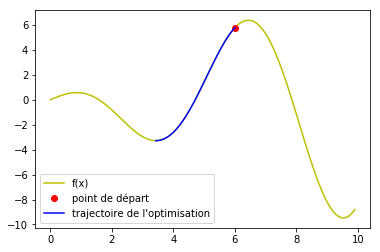

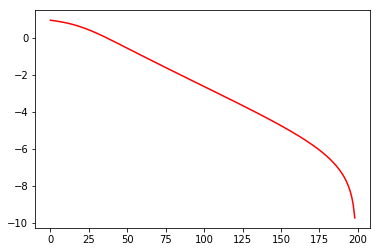

In [6]:
iterations = 200
eps = 0.01
xinit = np.array([6])

x_histo, f_histo, grad_histo = optimize(fonction1, dfonction1, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction1 et trajectoire de l'optimisation
abscisses = np.arange(0., 10., 0.1)
plt.plot(abscisses, fonction1(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

Test avec un epsilon assez grand

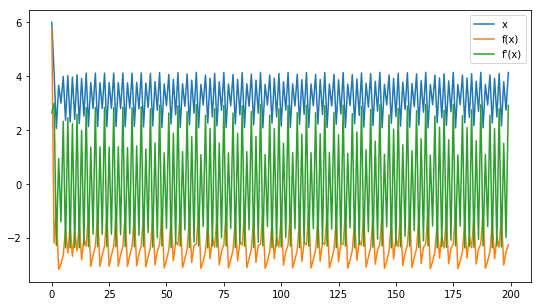

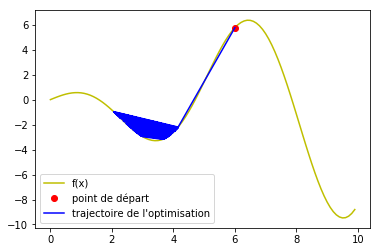

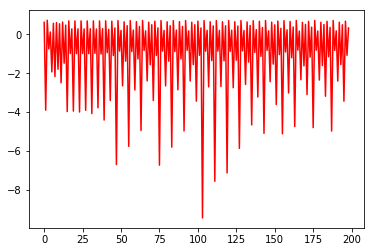

In [7]:
eps = 0.7

x_histo, f_histo, grad_histo = optimize(fonction1, dfonction1, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction1 et trajectoire de l'optimisation
abscisses = np.arange(0., 10., 0.1)
plt.plot(abscisses, fonction1(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

#### Remarque 
Pour la dernière courbe, lorsque epsilon est assez bas (0.01), la courbe "descend" progressivement et tend vers - l'infini.
Plus epsilon grandit, plus on aperçoit une courbe qui oscille lorsque la différence entre xt et x* diminue

C:\Users\Steban\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


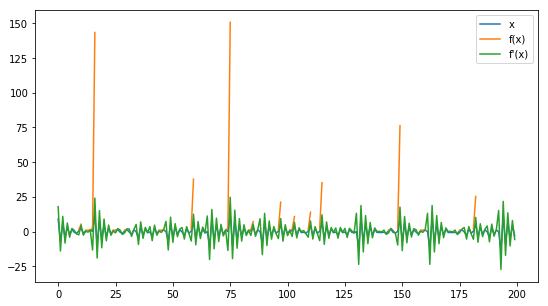

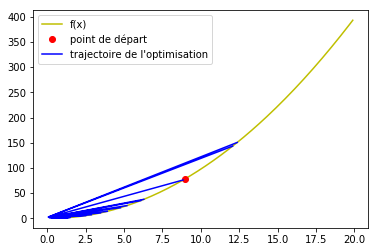

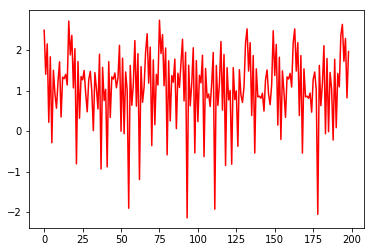

In [8]:
iterations = 200
eps = 0.9
xinit = np.array([9])

x_histo, f_histo, grad_histo = optimize(fonction2, dfonction2, xinit, eps, iterations)
afficher1d(x_histo, f_histo, grad_histo)

## fonction2 et trajectoire de l'optimisation
abscisses = np.arange(0.1, 20., 0.1)
plt.plot(abscisses, fonction2(abscisses), color="y", label="f(x)")
plt.plot(x_histo[0], f_histo[0], "o", color="r", label="point de départ")
plt.plot(x_histo, f_histo, color="b", label="trajectoire de l'optimisation")
plt.legend()
plt.show()

afficheLogDifference(x_histo)

Affichage 3d

In [9]:
iterations = 200
eps = 0.01
xinit = np.array([1,1])

x_histo, f_histo, grad_histo = optimize(fonction3, dfonction3, xinit, eps, iterations)

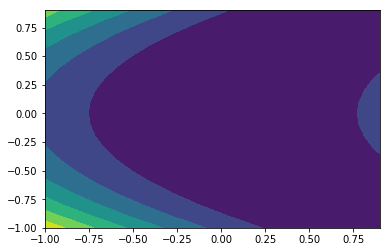

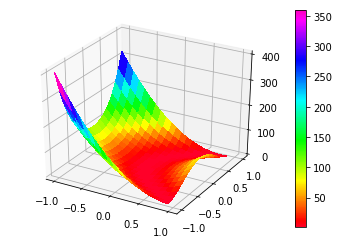

In [10]:
def make_grid(data=None, xmin=-5, xmax=5, ymin=-5, ymax=5, step=20):
    if data is not None:
        xmin, xmax, ymin, ymax = np.min(data[:,0]), np.max(data[:,0]),\
                                np.min(data[:,1]), np.max(data[:,1])
    x, y = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)*1./step),
                      np.arange(ymin, ymax, (ymax-ymin)*1./step))
    grid = np.c_[x.ravel(), y.ravel()]
    return grid, x, y

## Grille de discrétisation
grid, xx, yy = make_grid(xmin=-1, xmax=1, ymin=-1, ymax=1)

## Affichage 2D
plt.contourf(xx, yy, fonction3(grid).reshape(xx.shape))
fig = plt.figure()

## construction d'un referentiel 3d
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, fonction3(grid).reshape(xx.shape), rstride=1, cstride=1,\
                    cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
fig.colorbar(surf)
ax.plot(x_histo[:, 0], x_histo[:,1], f_histo.ravel(), color='black')

## Modelisation de la trajectoire de l'optimisation
## A faire

plt.show()

## Régression logistique
---

#### Classifieur - descente de gradient pour la régression logistique

In [11]:
class Classifier:
    def fit(self, datax, datay):
        """ X : base d'exemples d'apprentissage
            Y : labels
        """
        raise("Not implemented")
    
    def predict(self, datax):
        """ x : un exemple """
        raise("Not implemented")
    
    def score(self, datax, datay):
        """ X : exemples, Y : labels """
        return np.mean(self.predict(datax) == datay)

#### Régression logistique

In [12]:
class RegLogisticClassifier(Classifier):
    def __init__(self, max_iter, eps):
        self.max_iter = max_iter
        self.eps = eps
    
    def fit(self, datax, datay):
        self.X = datax
        self.Y = datay
        self.w = np.zeros(datax.shape[1])
        self.w = optimize(self.fonc, self.dfonc, \
                     self.w, self.eps, self.max_iter)[0][-1]
        
    def predict(self, datax):
        return np.sign(np.dot(self.w, datax.T))
    
    def fonc(self, w):
        res = 0.
        for i in range(len(self.X)):
            res += np.log(1 + \
                          np.exp(-(2*self.Y[i]-1) * np.dot(w,self.X[i])))
        return res
    
    def dfonc(self, w):
        res = 0.
        for i in range(len(self.X)):
            res += (-(2*self.Y[i]-1) * self.X[i] * \
                   np.exp(-(2*self.Y[i]-1) * np.dot(w,self.X[i])))\
            /(1 + np.exp(-(2*self.Y[i]-1) * np.dot(w,self.X[i])))
        return res


### Jeu de données USPS
----

Préparation données d'apprentissage et données de test

In [16]:
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

In [17]:
# Chargement des données
datax_train, datay_train = load_usps("data/usps_train.txt")
datax_test, datay_test = load_usps("data/usps_test.txt")

def dataset(datax, datay, c1, c2):
    # Extraction des données des 2 classes
    inds = np.where((datay == c1) | (datay == c2))[0]
    datax = datax[inds]

    # Labels +1 et -1
    datay = datay[inds]
    datay[datay == c1] = -1
    datay[datay == c2] = 1
    
    return datax, datay

score train : 0.999396499698
score test : 0.980603448276


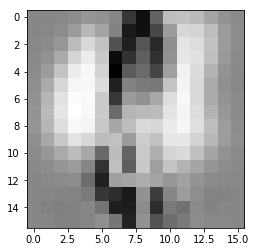

In [27]:
X_train, Y_train = dataset(datax_train, datay_train, 4, 1)
X_test, Y_test = dataset(datax_test, datay_test, 4, 1)

reglog = RegLogisticClassifier(200, 0.001)
reglog.fit(X_train, Y_train)
print("score train :", reglog.score(X_train, Y_train))
print("score test :", reglog.score(X_test, Y_test))
plt.imshow(reglog.w.reshape(16,16), cmap="Greys")
plt.show()

score train : 1.0
score test : 0.985422740525


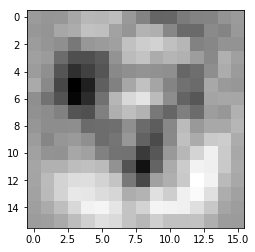

In [26]:
X_train, Y_train = dataset(datax_train, datay_train, 3, 9)
X_test, Y_test = dataset(datax_test, datay_test, 3, 9)

reglog = RegLogisticClassifier(200, 0.001)
reglog.fit(X_train, Y_train)
print("score train :", reglog.score(X_train, Y_train))
print("score test :", reglog.score(X_test, Y_test))
plt.imshow(reglog.w.reshape(16,16), cmap="Greys")
plt.show()

score train : 1.0
score test : 0.99711815562


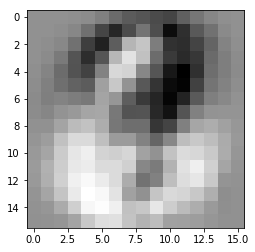

In [22]:
X_train, Y_train = dataset(datax_train, datay_train, 6, 9)
X_test, Y_test = dataset(datax_test, datay_test, 6, 9)

reglog = RegLogisticClassifier(200, 0.001)
reglog.fit(X_train, Y_train)
print("score train :", reglog.score(X_train, Y_train))
print("score test :", reglog.score(X_test, Y_test))
plt.imshow(reglog.w.reshape(16,16), cmap="Greys")
plt.show()

score train : 0.998787878788
score test : 0.980535279805


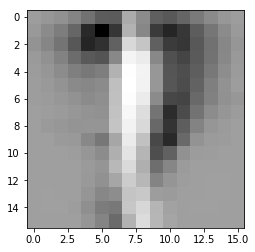

In [31]:
X_train, Y_train = dataset(datax_train, datay_train, 1, 7)
X_test, Y_test = dataset(datax_test, datay_test, 1, 7)

reglog = RegLogisticClassifier(200, 0.001)
reglog.fit(X_train, Y_train)
print("score train :", reglog.score(X_train, Y_train))
print("score test :", reglog.score(X_test, Y_test))
plt.imshow(reglog.w.reshape(16,16), cmap="Greys")
plt.show()

[Rq] : Le score est plutôt axé sur la première classe

In [33]:
# testé avec le classifieur qui a été entrainé avec 1 et 7
X_test, Y_test = dataset(datax_test, datay_test, 1, 6)
print("score test :", reglog.score(X_test, Y_test))

score test : 0.861751152074


#### Classification naïve bayésienne

In [29]:
class NaiveBayesianClassifier(Classifier):
    def __init__(self, bins=4):
        self.bins = bins
        
    def fit(self, datax, datay):
        self.X = datax
        self.Y = datay
        
        # p(Y)
        info_Y = np.unique(datay, return_counts=True)
        self.pY = info_Y[1]/len(datay)
        # p(X|Y)
        # discretisation de datax
        datax = self.discretise(datax, self.bins)
        #p(X|Y=-1)
        pX_Y_neg = np.unique(datax[datay == -1], return_counts=True)[1]/info_Y[1][0]
        #p(X|Y=1)
        pX_Y_pos = np.unique(datax[datay == 1], return_counts=True)[1]/info_Y[1][1]
        #p(X|Y)
        self.pX_Y = np.vstack((pX_Y_neg, pX_Y_pos))
    
    def predict(self, datax):
        datax = self.discretise(datax, self.bins)
        res = np.zeros(len(datax))
        for i, x in enumerate(datax):
            tmp1 = np.sum([np.log(self.pX_Y[0][x_i]) for x_i in x])
            tmp2 = np.sum([np.log(self.pX_Y[1][x_i]) for x_i in x])
            res[i] = 2* np.argmax([tmp1, tmp2]) - 1
        return res
    
    def discretise(self, datax, bins, res=0.0001):
        min, max = datax.min(), datax.max()
        return ((datax - min)/(max - min)*bins - res).astype(int)
    
    

In [30]:
X_train, Y_train = dataset(datax_train, datay_train, 3, 5)
X_test, Y_test = dataset(datax_test, datay_test, 3, 5)

nbc = NaiveBayesianClassifier(2000)
nbc.fit(X_train, Y_train)
print("score train :", nbc.score(X_train, Y_train))
print("score test :", nbc.score(X_test, Y_test))

score train : 0.883031301483
score test : 0.539877300613
